#### Install library

In [39]:
!pip install librosa
!pip install SpeechRecognition
!pip install moviepy
!pip install python-docx
!pip install mecab-python3
!pip install unidic-lite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.7/581.7 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 27.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658818 sha256=d56e8b654de774da6fb0703a868f1ffe06614c8dcfd7249a53dd78f88f716952
  Stored in directory: /root/.cache/pip/wheels/89/e8/68/f9ac36b8cc6c8b3c96888cd57434abed96595d444f42243853
Successfully built unidic-lite


### Import Libray

In [ ]:
import pandas as pd
import librosa
import math

### Sampling to 16000Hz the audio file to wav file

In [9]:
#!ffmpeg -i origin.flac -acodec pcm_s16le -ac 1 -ar 16000 origin.wav
#!ffmpeg -i khin.flac -acodec pcm_s16le -ac 1 -ar 16000 khin.wav


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

<Axes: >

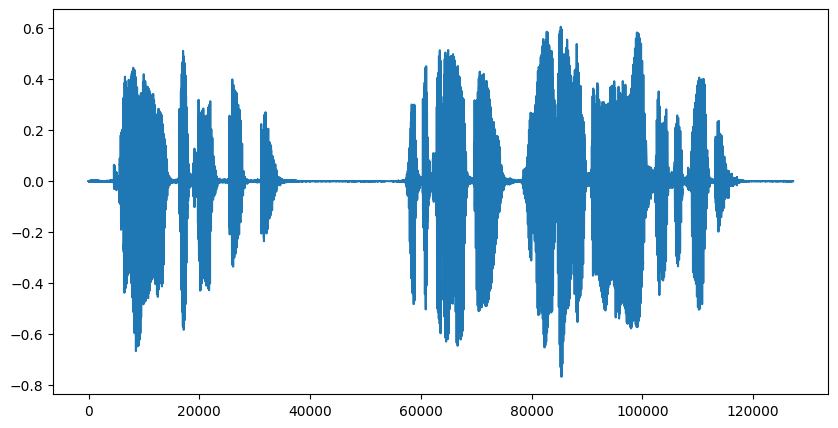

In [60]:
# Load and preprocess audio features (MFCCs) from two audio files
audio1, _= librosa.load('./dataset/origin.wav')
pd.Series(audio1).plot(figsize=(10,5))

<Axes: >

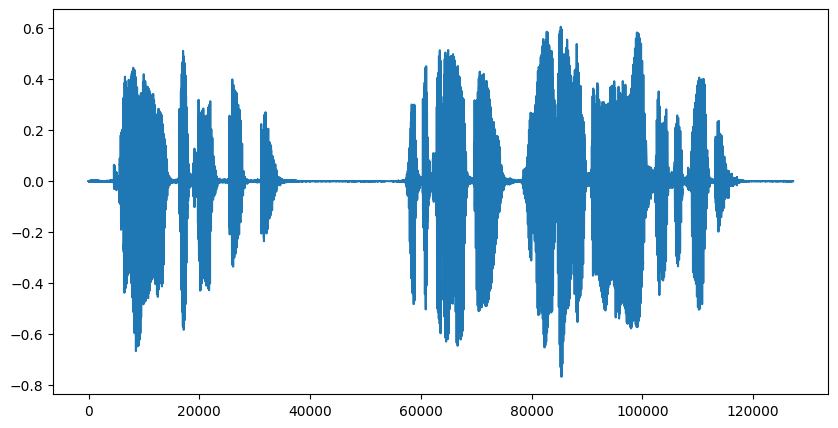

In [59]:
# Load and preprocess audio features (MFCCs) from two audio files
audio2, _= librosa.load('./dataset/khin.wav')
pd.Series(audio1).plot(figsize=(10,5))

### Load Speech recognizer

In [31]:
import speech_recognition as sr
from moviepy.editor import AudioFileClip
r = sr.Recognizer()

MoviePy - Writing audio in audio2.wav


MoviePy - Done.


車に乗って帰っていたあとからまたいろいろ 若いものに冷やかされた


### audio 1

In [35]:
my_clip = AudioFileClip("./dataset/origin.wav")
audio1 = "audio1.wav"
my_clip.write_audiofile(audio1)

with sr.AudioFile(audio1) as source:
    audio1 = r.record(source)
text1= r.recognize_google(audio1, language="ja-JP")
print(text1)

MoviePy - Writing audio in audio1.wav


MoviePy - Done.


車に乗って帰っていった後からまたいろいろ 若い者に冷やかされた


#### However , text1 won't be used since the transcript of the audio file is already in-hand.


In [49]:
text1= "車 に 乗っ て 帰っ て 行っ た 。 あと から また いろいろ 若い もの に 冷かさ れ た 。"

### Dataset cleaning unnecssary words

In [50]:
text1=text1.replace("。","").replace("-","").replace(" ","").replace("ゼロ","ぜろ").replace("れい","ぜろ")

### audio 2


In [51]:
my_clip = AudioFileClip("./dataset/khin.wav")
audio2 = "audio2.wav"
my_clip.write_audiofile(audio2)

with sr.AudioFile(audio2) as source:
    audio2 = r.record(source)
text2= r.recognize_google(audio2, language="ja-JP")
print(text2)

MoviePy - Writing audio in audio2.wav


MoviePy - Done.


車に乗って帰っていたあとからまたいろいろ 若いものに冷やかされた


### Dataset cleaning unnecssary words

In [52]:
text2=text2.replace("。","").replace("-","").replace(" ","").replace("ゼロ","ぜろ").replace("れい","ぜろ")

### split the character with mecab


In [40]:
import MeCab
wakati = MeCab.Tagger("-Owakati")

In [53]:
text1_mecab=wakati.parse(text1).split()
text1_mecab

['車',
 'に',
 '乗っ',
 'て',
 '帰っ',
 'て',
 '行っ',
 'た',
 'あと',
 'から',
 'また',
 'いろいろ',
 '若い',
 'もの',
 'に',
 '冷かさ',
 'れ',
 'た']

In [54]:
text2_mecab=wakati.parse(text2).split()
text2_mecab

['車',
 'に',
 '乗っ',
 'て',
 '帰っ',
 'て',
 'い',
 'た',
 'あと',
 'から',
 'また',
 'いろいろ',
 '若い',
 'もの',
 'に',
 '冷やかさ',
 'れ',
 'た']

In [62]:
def jaccard_similarity(x,y):
  """ returns the jaccard similarity between two lists """
  intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
  union_cardinality = len(set.union(*[set(x), set(y)]))
  return intersection_cardinality/float(union_cardinality)

print("Audio 1 is ",text1)
print("Audio 2 is ",text2)
print("Similarity score",math.ceil(jaccard_similarity(text1_mecab,text2_mecab) *100),"%")

Audio 1 is  車に乗って帰って行ったあとからまたいろいろ若いものに冷かされた
Audio 2 is  車に乗って帰っていたあとからまたいろいろ若いものに冷やかされた
Similarity score 77 %
